In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python -m pip install pyyaml
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Cloning into 'detectron2'...
remote: Enumerating objects: 15819, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 15819 (delta 31), reused 47 (delta 17), pack-reused 15743 (from 1)
Receiving objects: 100% (15819/15819), 6.38 MiB | 10.79 MiB/s, done.
Resolving deltas: 100% (11527/11527), done.
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.4 MB/s eta 0:0

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.5 ; cuda:  cu121
detectron2: 0.6


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import BoxMode

In [ ]:
import torch
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg

# 모델 설정
cfg = get_cfg()
cfg.merge_from_file("/content/drive/MyDrive/Dataset/자연재해로 인한 생활시설 안전 데이터/112.자연재해로 인한 생활시설 안전 데이터(AI모델)/① 모델소스코드/detectron2/configs/Detectron1-Comparisons/mask_rcnn_R_50_FPN_noaug_1x.yaml")
#cfg.merge_from_file("/content/drive/MyDrive/Dataset/자연재해로 인한 생활시설 안전 데이터/112.자연재해로 인한 생활시설 안전 데이터(AI모델)/① 모델소스코드/detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/Dataset/자연재해로 인한 생활시설 안전 데이터/112.자연재해로 인한 생활시설 안전 데이터(AI모델)/② AI학습모델파일/112. 자연재해로 인한 생활시설 안전 데이터/model_Typoon/model_final.pth"  # 학습된 모델 경로
#cfg.MODEL.WEIGHTS = "/content/자연재해로 인한 생활시설 안전 데이터/112.자연재해로 인한 생활시설 안전 데이터(AI모델)/② AI학습모델파일/112. 자연재해로 인한 생활시설 안전 데이터/model_Heavysnow/model_final.pth"
#cfg.MODEL.WEIGHTS = "/content/자연재해로 인한 생활시설 안전 데이터/112.자연재해로 인한 생활시설 안전 데이터(AI모델)/② AI학습모델파일/112. 자연재해로 인한 생활시설 안전 데이터/model_Earthquake/model_final.pth"

predictor = DefaultPredictor(cfg)

# 이미지를 입력받아 예측
im = cv2.imread("/content/drive/MyDrive/Dataset/태풍.jpg") #예측 이미지 삽입
outputs = predictor(im)


[11/24 17:32:51 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/Dataset/자연재해로 인한 생활시설 안전 데이터/112.자연재해로 인한 생활시설 안전 데이터(AI모델)/② AI학습모델파일/112. 자연재해로 인한 생활시설 안전 데이터/model_Typoon/model_final.pth ...


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

In [ ]:
# 예측 결과를 JSON 파일로 저장
instances = outputs["instances"].to("cpu")
predictions = {
    "boxes": instances.pred_boxes.tensor.tolist(),  # 예측된 바운딩 박스
    "scores": instances.scores.tolist(),          # 예측 점수
    "classes": instances.pred_classes.tolist(),   # 예측 클래스
}

for attr in dir(instances):
    if not attr.startswith("_"):  # 내부 속성 제외
        value = getattr(instances, attr)
        print(f"{attr}: {value}")


output_file = "/content/predictions.json"
with open(output_file, "w") as f:
    json.dump(predictions, f)

print(f"예측 결과가 JSON 파일로 저장되었습니다: {output_file}")

cat: <function Instances.cat at 0x79cc46430550>
get: <bound method Instances.get of Instances(num_instances=4, image_height=549, image_width=976, fields=[pred_boxes: Boxes(tensor([[334.0023, 310.2948, 546.2953, 356.8759],
        [843.0951, 388.0343, 971.6232, 549.0000],
        [875.1045, 434.7669, 972.2217, 549.0000],
        [847.0958, 435.3379, 974.3769, 496.9339]])), scores: tensor([0.0653, 0.0544, 0.0524, 0.0507]), pred_classes: tensor([26, 26, 64, 26]), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ...

In [ ]:
# 예측 결과 출력
instances = outputs["instances"]

# 클래스 출력
print("Predicted classes:", instances.pred_classes)

# 바운딩 박스 출력
print("Predicted boxes:", instances.pred_boxes)

# 객체의 마스크가 있을 경우 마스크 출력
if instances.has("pred_masks"):
    print("Predicted masks:", instances.pred_masks)

# 예측 확신도 출력
print("Predicted scores:", instances.scores)


Predicted classes: tensor([26, 26, 64, 26], device='cuda:0')
Predicted boxes: Boxes(tensor([[334.0023, 310.2948, 546.2953, 356.8759],
        [843.0951, 388.0343, 971.6232, 549.0000],
        [875.1045, 434.7669, 972.2217, 549.0000],
        [847.0958, 435.3379, 974.3769, 496.9339]], device='cuda:0'))
Predicted masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
 

In [ ]:
from detectron2.data import MetadataCatalog

# 클래스 이름 가져오기
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
class_names = metadata.thing_classes

# 클래스 인덱스에서 이름으로 변환
predicted_classes = instances.pred_classes.tolist()
predicted_class_names = [class_names[i] for i in predicted_classes]
print("Predicted class names:", predicted_class_names)


Predicted class names: ['handbag', 'handbag', 'mouse', 'handbag']


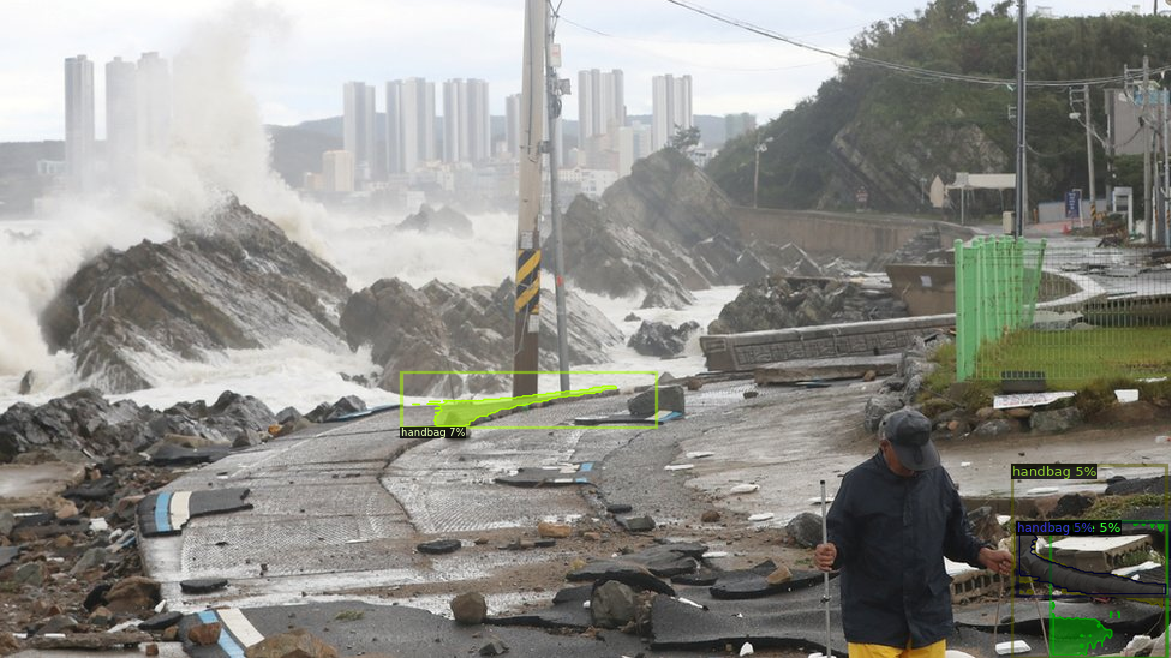

In [ ]:
from google.colab.patches import cv2_imshow
from detectron2.utils.visualizer import Visualizer
import cv2

# 원본 이미지 시각화
v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=1.2)
v = v.draw_instance_predictions(instances.to("cpu"))
output_image = v.get_image()[:, :, ::-1]

# 결과 이미지 표시
cv2_imshow(output_image)  # Colab에서는 cv2.imshow() 대신 cv2_imshow()를 사용합니다.
cv2.waitKey(0)
cv2.destroyAllWindows()

